Cluster assignments:
{0: [0, 2, 3, 4, 6], 1: [1, 7, 8, 9], 2: [5]}
Dimensione del multi-cut minimo: 2


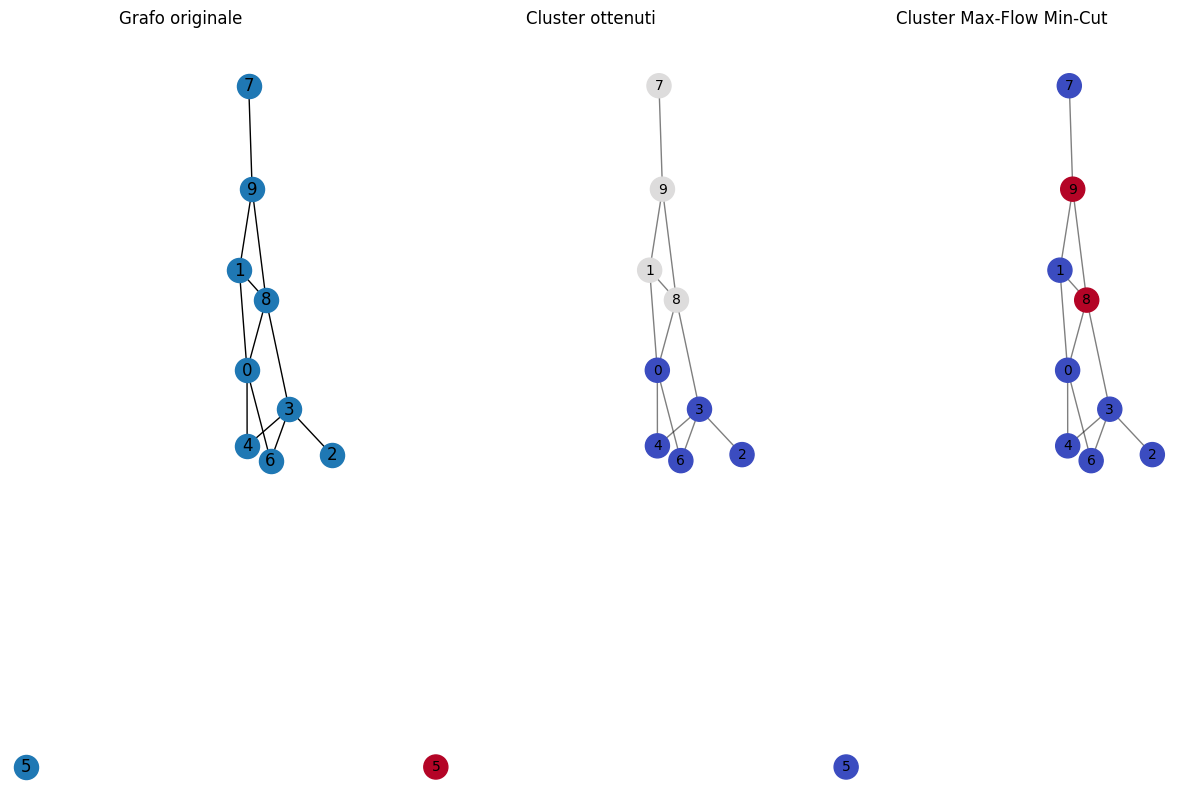

Tempo di esecuzione: 0.2505502700805664 secondi


In [42]:
import networkx as nx
import matplotlib.pyplot as plt
import community
import time

# Registra l'istante di inizio dell'esecuzione
start_time = time.time()

# Creazione di un grafo casuale con 10 nodi e 15 archi
G = nx.gnm_random_graph(n=10, m=12, seed=42)  # Aggiungi 'seed' per riproducibilità

# Assegna pesi finiti agli archi del grafo casuale
for u, v in G.edges():
    G.edges[u, v]['capacity'] = 1  # Imposta la capacità a 1 (puoi modificare questo valore a tuo piacimento)

# Estraiamo le feature dei nodi (esempio: gradi dei nodi)
node_degrees = dict(G.degree())

# Convertiamo i gradi dei nodi in una lista di feature
node_features = [degree for node, degree in node_degrees.items()]

# Calcoliamo la partizione ottimale basata sulla modolarità utilizzando Louvain
partition = community.best_partition(G)

# Aggiungi l'etichetta del cluster come attributo per ogni nodo del grafo
nx.set_node_attributes(G, partition, 'cluster_label')

# Creiamo i sottoinsiemi V1, ..., Vk basati sulle etichette dei cluster
k = max(partition.values()) + 1  # Numero di cluster ottenuto
partition_dict = {i: [] for i in range(k)}
for node, label in partition.items():
    partition_dict[label].append(node)

# Stampa dell'output: dizionario dei cluster
print("Cluster assignments:")
print(partition_dict)

# La variabile 'cut_value' conterrà la dimensione del multi-cut minimo
print("Dimensione del multi-cut minimo:", cut_value)

# Per visualizzare i cluster
pos = nx.spring_layout(G)  # Layout per posizionare i nodi
plt.figure(figsize=(15, 10))  # Dimensione della figura

# Prima visualizzazione: Grafo originale con etichette dei nodi
plt.subplot(1, 3, 1)
plt.axis("off")
nx.draw_networkx(G, pos, with_labels=True)
plt.title("Grafo originale")

# Seconda visualizzazione: Cluster ottenuti da Louvain
plt.subplot(1, 3, 2)
plt.axis("off")
# Coloriamo i nodi in base all'etichetta del cluster
nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.get_cmap("coolwarm"), node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
# Aggiungi le label dei nodi originali (etichette dei nodi iniziali)
node_labels = {node: str(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')
plt.title("Cluster ottenuti")

# Terza visualizzazione: Cluster ottenuti da Max-Flow Min-Cut
plt.subplot(1, 3, 3)
plt.axis("off")
# Coloriamo i nodi in base alla partizione ottenuta
nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.get_cmap("coolwarm"), node_color=list(color_map.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
# Aggiungi le label dei nodi originali (etichette dei nodi iniziali)
node_labels = {node: str(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')
plt.title("Cluster Max-Flow Min-Cut")

plt.show()


# Registra l'istante di fine dell'esecuzione
end_time = time.time()

# Calcola il tempo di esecuzione in secondi
execution_time = end_time - start_time

print("Tempo di esecuzione:", execution_time, "secondi")



# PLI (Programmazione Lineare Intera)
## 

Per formulare il problema del multi-cut minimo come un problema di Programmazione Lineare (LP) o Programmazione Intera (IP), dovremo definire le variabili, la funzione obiettivo e i vincoli del problema in modo appropriato.

Supponiamo di avere un grafo G=(V, E), dove V è l'insieme dei nodi e E è l'insieme degli archi. Definiamo le seguenti variabili decisionali:

1. Variabili binarie:
   - x_ij: variabile binaria che assume valore 1 se l'arco (i, j) è presente nel taglio (cioè i e j appartengono a sottografi diversi), altrimenti assume valore 0.

2. Variabili continue (opzionali):
   - y_i: variabile continua che rappresenta una misura di quanto il nodo i è associato al cluster 1 (o al cluster principale).

La funzione obiettivo sarà minimizzare la somma dei valori delle variabili x_ij per tutti gli archi (i, j):

Minimizza: Σ x_ij

#### Soggetto ai seguenti vincoli:

1. Vincolo di connettività:
   Per ogni nodo i, la somma delle variabili x_ij per tutti gli archi (i, j) incidenti al nodo i deve essere uguale a 1. Questo vincolo garantisce che ogni nodo sia assegnato a un solo sottografo.

   Σ x_ij = 1, per ogni nodo i ∈ V

2. Vincolo sulle variabili binarie:
   Le variabili binarie x_ij devono essere comprese tra 0 e 1.

   0 ≤ x_ij ≤ 1, per ogni arco (i, j) ∈ E

3. Vincoli di bilanciamento (opzionali):
   Se si utilizzano le variabili continue y_i per misurare l'associazione del nodo i al cluster principale, dovremmo aggiungere vincoli di bilanciamento per controllare l'assegnazione dei nodi ai sottografi.

   - Se il nodo i appartiene al cluster principale, allora y_i = 1.
   - Se il nodo i appartiene al cluster secondario, allora y_i = 0.

Con queste variabili e vincoli, il problema diventa un problema di ottimizzazione lineare o intera. Se tutte le variabili sono continue, otteniamo un problema di Programmazione Lineare (LP). Se almeno una variabile è discreta (binaria), otteniamo un problema di Programmazione Intera (IP).



Status: Optimal
Archi del multi-cut:
(0, 8)
(1, 5)
(2, 6)
(3, 4)
(7, 9)


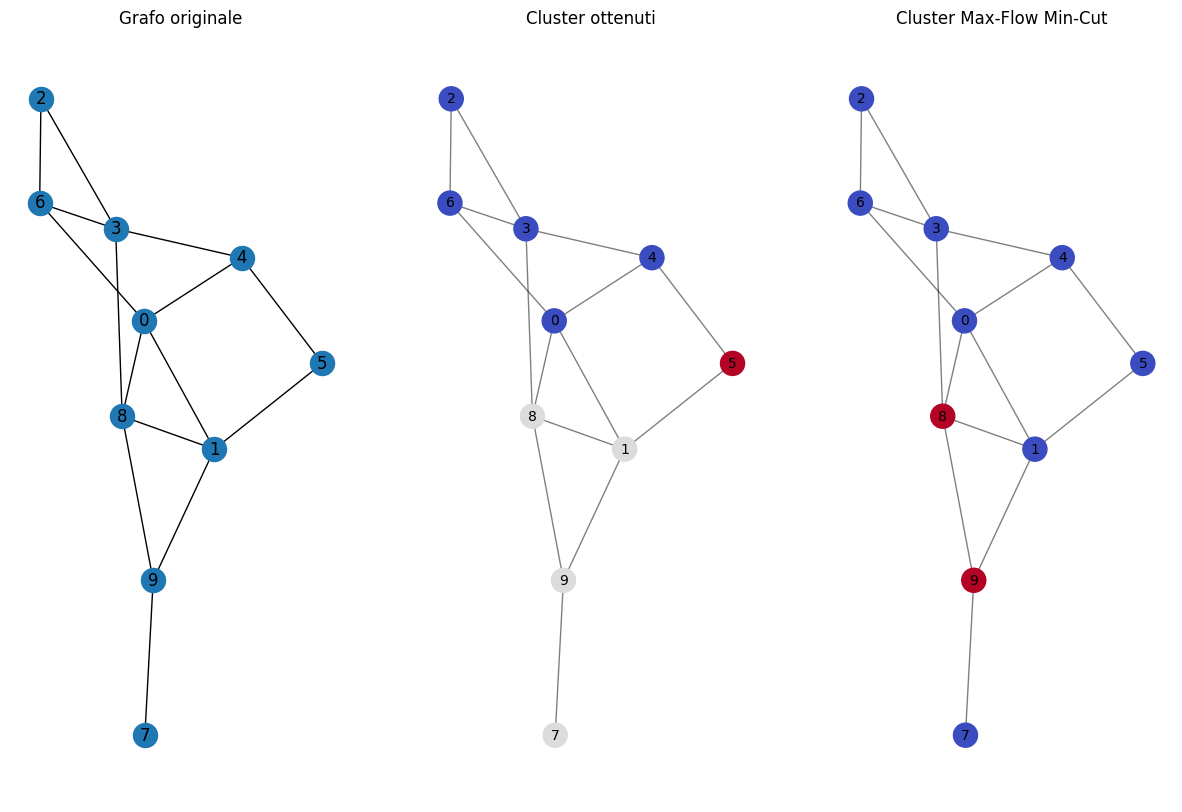

In [48]:
import networkx as nx
import matplotlib.pyplot as plt
import pulp

# Creazione del grafo (puoi usare il tuo)
G = nx.gnm_random_graph(n=10, m=15, seed=42)


# Definizione del problema di ottimizzazione
prob = pulp.LpProblem("Minimum_MultiCut", pulp.LpMinimize)

# Variabili binarie x_ij
x = pulp.LpVariable.dicts("x", G.edges(), lowBound=0, upBound=1, cat=pulp.LpBinary)

# Funzione obiettivo: minimizzare la somma dei valori delle variabili x_ij
prob += pulp.lpSum(x[edge] for edge in G.edges())

# Vincolo di connettività: ogni nodo i deve essere assegnato a un solo sottografo
for node in G.nodes():
    prob += pulp.lpSum(x[(i, j)] for i, j in G.edges() if i == node or j == node) == 1

# Se si utilizzano le variabili continue y_i per misurare l'associazione del nodo i al cluster principale,
# dovremmo aggiungere i vincoli di bilanciamento:
# y_i = 1 se il nodo i appartiene al cluster principale, y_i = 0 altrimenti

# Risoluzione del problema
#prob.solve()
prob.solve(pulp.PULP_CBC_CMD(msg=0))

# Stampa del risultato
print("Status:", pulp.LpStatus[prob.status])

# Stampa delle variabili binarie con valore 1 (i.e., archi del multi-cut)
print("=====================================================")
print("Archi del multi-cut:")
print("=====================================================")
for edge in G.edges():
    if pulp.value(x[edge]) == 1:
        print(edge)



# Per visualizzare i cluster
pos = nx.spring_layout(G)  # Layout per posizionare i nodi
plt.figure(figsize=(15, 10))  # Dimensione della figura

# Prima visualizzazione: Grafo originale con etichette dei nodi
plt.subplot(1, 3, 1)
plt.axis("off")
nx.draw_networkx(G, pos, with_labels=True)
plt.title("Grafo originale")

# Seconda visualizzazione: Cluster ottenuti da Louvain
plt.subplot(1, 3, 2)
plt.axis("off")
# Coloriamo i nodi in base all'etichetta del cluster
nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.get_cmap("coolwarm"), node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
# Aggiungi le label dei nodi originali (etichette dei nodi iniziali)
node_labels = {node: str(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')
plt.title("Cluster ottenuti")

# Terza visualizzazione: Cluster ottenuti da Max-Flow Min-Cut
plt.subplot(1, 3, 3)
plt.axis("off")
# Coloriamo i nodi in base alla partizione ottenuta
nx.draw_networkx_nodes(G, pos, node_size=300, cmap=plt.get_cmap("coolwarm"), node_color=list(color_map.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
# Aggiungi le label dei nodi originali (etichette dei nodi iniziali)
node_labels = {node: str(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, font_color='black')
plt.title("Cluster Max-Flow Min-Cut")

plt.show()